In [7]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
A=np.array([[1, 3],[-1, 7]])
B=np.array([[5, 2],[1, 2]])
I=np.eye(2, dtype=int)

print(A)
print(B)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [16]:
C=2*I+3*A+A@B

print(C)

[[13 17]
 [-1 35]]


In [17]:
M=np.array([[1, 3],[-1, 7]])
I=np.eye(2, dtype=int)

In [18]:
det = la.det(M)
tr = np.trace(M)
P2 = (det*I) - (tr*M) + (mpow(M,2))

In [19]:
print("Determinante : ",det)
print("Traza: ", tr)
print("Matriz Caracteristica: ")
print(P2)

Determinante :  10.0
Traza:  8
Matriz Caracteristica: 
[[0. 0.]
 [0. 0.]]


In [21]:
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [22]:
M=np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)
print('det(M) = ', la.det(M))

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
det(M) =  -1.0000000000000004


In [23]:
A=np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [24]:
A1 = scale_row(A,1/3,1)
A2 = add_row(A1,-1,1,0)
print(A2)

[[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          2.         -1.          0.          0.          1.        ]]


In [25]:
A3 = scale_row(A2,1/2,2)
A4= add_row(A3,(-3/5.),2,1)
print(A4)

[[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          0.         -0.1         0.6        -0.2         0.5       ]]


In [26]:
A5 = add_row(A4,10.0,0,2)
A6 = add_row(A5,(-20/3),1,2)
A7 = add_row(A6,9/5,0,1)
print(A7)

[[ 1.00000000e+00  0.00000000e+00 -1.77635684e-16 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.66666667e+00 -2.22044605e-16 -5.00000000e+00
   1.66666667e+00 -3.33333333e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e-01  6.00000000e-01
  -2.00000000e-01  5.00000000e-01]]


In [27]:
A8 = scale_row(A7,3/5,1)
A9 = scale_row(A8,-10,2)
print(A9)

[[ 1.00000000e+00  0.00000000e+00 -1.77635684e-16 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.33226763e-16 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -6.00000000e+00
   2.00000000e+00 -5.00000000e+00]]


In [32]:
M_inv=A9[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [31]:
result=M_inv @ M
print(result)

[[ 1.00000000e+00 -8.88178420e-16  2.22044605e-16]
 [-4.44089210e-16  1.00000000e+00  0.00000000e+00]
 [-8.88178420e-16  0.00000000e+00  1.00000000e+00]]


In [30]:
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [33]:
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [36]:
x = M_inv @ b 
print(x)
print()
print("Solución usando scipy.linalg.solve")
x_sol = la.solve(M, b)
print(x_sol)

[[3.]
 [2.]
 [4.]]

Solución usando scipy.linalg.solve
[[3.]
 [2.]
 [4.]]


In [37]:
B1 =np.array([[2,0,0],
              [0,3,4],
              [0,4,9]])

print("Matriz B1")
print(B1)

eigvalsB1, eigvecsB1=la.eig(B1)

print('Eigenvalores:', eigvalsB1)

v1 = eigvecsB1[:,0]
v2 = eigvecsB1[:,1]
v3 = eigvecsB1[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B1
[[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
v1= [0.         0.4472136  0.89442719]
v2= [ 0.          0.89442719 -0.4472136 ]
v3= [1. 0. 0.]


In [38]:
B2 =np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])

print("Matriz B2")
print(B2)

eigvalsB2, eigvecsB2 = la.eig(B2)

print('Eigenvalores:', eigvalsB2)

v1 = eigvecsB2[:,0]
v2 = eigvecsB2[:,1]
v3 = eigvecsB2[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B2
[[0 1 0]
 [0 0 1]
 [1 0 0]]
Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
v1= [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
v2= [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
v3= [-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j]


In [39]:
B3 =np.array([[2,0,0,0],
              [1,2,0,0],
              [0,1,3,0],
              [0,0,1,3]])

print("Matriz B2")
print(B3)

eigvalsB3, eigvecsB3 = la.eig(B3)

print('Eigenvalores:', eigvalsB3)

v1 = eigvecsB3[:,0]
v2 = eigvecsB3[:,1]
v3 = eigvecsB3[:,2]
v4 = eigvecsB3[:,3]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print('v4=',v4)

Matriz B2
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
v1= [0. 0. 0. 1.]
v2= [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
v3= [ 0.          0.57735027 -0.57735027  0.57735027]
v4= [ 2.56395025e-16 -5.77350269e-01  5.77350269e-01 -5.77350269e-01]


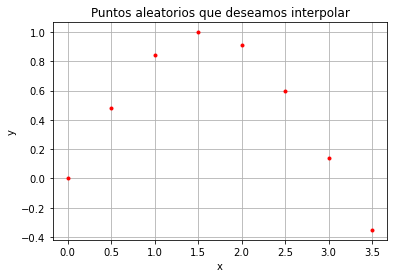

In [40]:
N = np.array([[0.0, 0.0], 
               [0.5, 0.47942], 
               [1.0 , 0.84147],
               [1.5 , 0.99749],
               [2.0 , 0.90930],
               [2.5 , 0.59847],
               [3.0 , 0.14112],
               [3.5 ,-0.35078]])

i = 0 
j = 1 
x = [fila[i] for fila in N]
y = [fila[j] for fila in N]
x = np.array(x)
y= np.array(y)

plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos aleatorios que deseamos interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [42]:
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


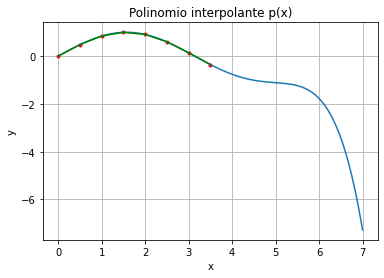

In [43]:
xs = np.linspace(0,8-1,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys);
plt.plot(x,np.sin(x),"g")
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()